<a href="https://colab.research.google.com/github/Lu1sV1rus/Investigacion-de-Operaciones-/blob/main/Probabilidades_del_tablero_de_colores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Probabilidades del tablero de colores</h1>
<p>Elaborar en Jupyter Notebook (Google Colab) un programa para calcular las probabilidades x_n, y_n, z_n, t_n y graficarlas (Ajustar el código que se mostró en clase).

Esto nos dará la respuesta al problema resuelto en clase:</p>



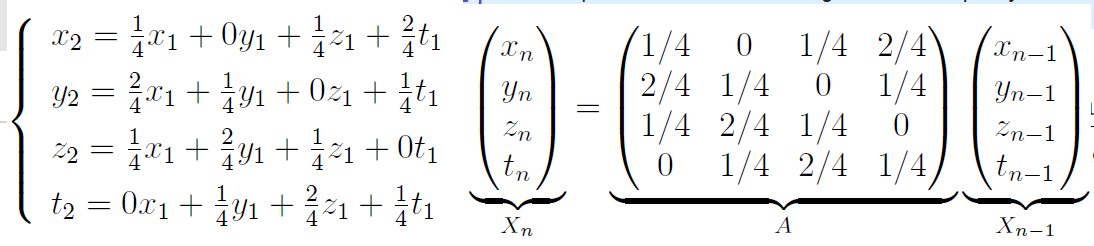

In [2]:
# Importamos las librerias necesarias
import numpy as np                                                              # para operar matrices
import pandas as pd                                                             # para trabajar con dataframes
import matplotlib.pyplot as plt                                                 # para poder graficar


<p><font color="tomato"><h2>Planteamiento</h2></font></p>
<p> Para poder encontar la solucion, necesitamos iterar la multiplicacion de las matrices <font color="pink">(A)(X_n-1) = X_n</font>, de forma que podamos obtener <font color="pink">X_n</font>, sin embargo tambien necesitamos una condicion que detenga el proceso cuando los valores convergan</p>


<p><h2><font color="cyan">Documentacion</h2></font></p>
<p><font color="violet"> A=M </font>la matriz que contiene los valores de de probabilidad</p>
<p><font color="lightgreen"> X=v </font>la matriz que contiene el valor las variables</p>
<p><font color="skyblue"> archivo </font>es una matriz que contendra un historial de las variables


In [67]:
# Programa
M = np.array([[0.25, 0.00, 0.25, 0.50],                                         # creamos la matriz A
              [0.50, 0.25, 0.00, 0.25],
              [0.25, 0.50, 0.25, 0.00],
              [0.00, 0.25, 0.50, 0.25]])

v = np.array([0.2, 0.3, 0.3, 0.2])                                              # creamos el vector X

archivo = [v.copy()]                                                            # guardamos el vector en un archivo (historial para el dataframe)

<p><h2><font color="cyan">Documentacion</h2></font></p>

<p><font color="tomato"> v_anterior = v.copy() </font>creamos una variable a la cual le asignamos el valor que tenga v</p>
<p><font color="lightgreen"> v = M @ v_anterior </font>realizamos la multiplicacion de las matrices para obtener los nuevos valores</p>
<p><font color="orange"> archivo.append(v.copy()) </font>guardamos el nuevo valor en la matriz archivo, generando un historial</p>
<p><font color="pink"> if np.linalg.norm(v - v_anterior) < 1e-6 </font>creamos una condicion, en la cual detiene el ciclo cuando la diferencia entre los valores es minima </p>
<p><font color="skyblue"> if i == 999: </font>creamos una condicion, que indique que el metodo no llego a converger</p>



In [72]:
for i in range(1, 1000):                                                        # iteramos 1000 veces
    v_anterior = v.copy()                                                       # guardamos el vector en una variable auxiliar X_n-1
    v = M @ v_anterior                                                          # calculamos el vector X_n = (A)(X_n-1)

    archivo.append(v.copy())                                                    # guardamos el nuevo valor de X en el archivo, colocandolo al final

    if np.linalg.norm(v - v_anterior) < 1e-6:                                   # creamos una condicion, en caso de que la dif sea menor a 1e-6
        print("\nConverge")                                                     # imprimimos que converge
        print("i    |   xi    |   yi    |   zi    |   ti")
        print(f"{i:<4} | {v[0]:.5f} | {v[1]:.5f} | {v[2]:.5f} | {v[3]:.5f}")    # e imprimimos los valores finales
        break

    if i == 999:                                                                # creamos la condicion, en caso de que se llegue al limite de iteraciones
        print("\nNo converge")                                                  # imprimimos que no converge
        print("i    |   xi    |   yi    |   zi    |   ti")
        print(f"{i:<4} | {v[0]:.5f} | {v[1]:.5f} | {v[2]:.5f} | {v[3]:.5f}")    # e imprimimos los ultimos valores


Converge
i    |   xi    |   yi    |   zi    |   ti
1    | 0.25000 | 0.25000 | 0.25000 | 0.25000


<p><h2><font color="tomato">Planteamiento</h2></font></p>
<p> Como metodo alternativo se puede resolver como <font color="tomato"> (A)^n * (X)=X_n </font></p>

<p><h2><font color="cyan">Documentacion</h2></font></p>
<p><font color="lightgreen"> An = np.linalg.matrix_power() </font>con numpy podemos realizar la (A)^n</p>
<p><font color="orange"> (A)^n </font>es la matriz A^n </p>
<p><font color="tomato"> i </font>es n, el numero de elevacion, uso el valor de i ya que estas fueron las iteraciones necesarias para resolverlo con el metodo anterior</p>
<p><font color="skyblue"> vn = An @ v </font>finalmente calculamos el valor de X_n y los imprimimos con el formato anterior</p>

In [69]:
An = np.linalg.matrix_power(M, i)                                               # con numpy podemos elevar la matriz M a la i potencia
vn = An @ v                                                                     # Multiplicamos (A)^n * (X) para calcular el valor de X_n
print("i    |   xi    |   yi    |   zi    |   ti")
print(f"{i:<4} | {vn[0]:.5f} | {vn[1]:.5f} | {vn[2]:.5f} | {vn[3]:.5f}")        # imprimimos los valores de X_n

i    |   xi    |   yi    |   zi    |   ti
18   | 0.25000 | 0.25000 | 0.25000 | 0.25000


<p><h2><font color="cyan">Documentacion</h2></font></p>

<p><font color="tomato"> pd.DataFrame() </font>creamos un dataframe</p>
<p><font color="lightgreen"> np.array(archivo) </font>indicamos que los valores se encuentran en archivo</p>
<p><font color="orange"> columns=["X", "Y", "Z", "T"] </font>y que los nombres de las variables son X,Y,Z,T</p>
<p><font color="pink"> df.index.name = "Iteración" </font>asignamos el nombre de Iteracion al menu (index) para la grafica</p>
<p><font color="skyblue"> df </font>llamamos al dataframe para ver los valores</p>

In [70]:
# Creamos un dataframe
df = pd.DataFrame(np.array(archivo), columns=["X", "Y", "Z", "T"])              # con los datos guardados en archivo y le asignamos un nombre
df.index.name = "Iteración"                                                     # asignamos el nombre de Iteracion al menu (index)
df                                                                              # imprimimos el dataframe

,X,Y,Z,T
Iteración,,,,
0,0.200000,0.300000,0.300000,0.200000
1,0.225000,0.225000,0.275000,0.275000
2,0.262500,0.237500,0.237500,0.262500
3,0.256250,0.256250,0.243750,0.243750
4,0.246875,0.253125,0.253125,0.246875
5,0.248438,0.248438,0.251563,0.251563
6,0.250781,0.249219,0.249219,0.250781
7,0.250391,0.250391,0.249609,0.249609
8,0.249805,0.250195,0.250195,0.249805


<p><h2><font color="cyan">Documentacion</h2></font></p>

<p><font color="tomato"> plt.figure() </font>creamos una figura</p>
<p><font color="lightgreen"> df.plot() </font>indicamos que los datos para la grafica estan en el dataframe</p>
<p><font color="orange"> ax=plt.gca() </font>asignamos las variables X,Y,Z,T como los ejes que tendra el grafico
<p><font color="pink"> linewidth=2 </font>el tamaño de las lineas es 2</p>
<p><font color="skyblue"> plt.show()  </font>finalmete mostramos la figura</p>

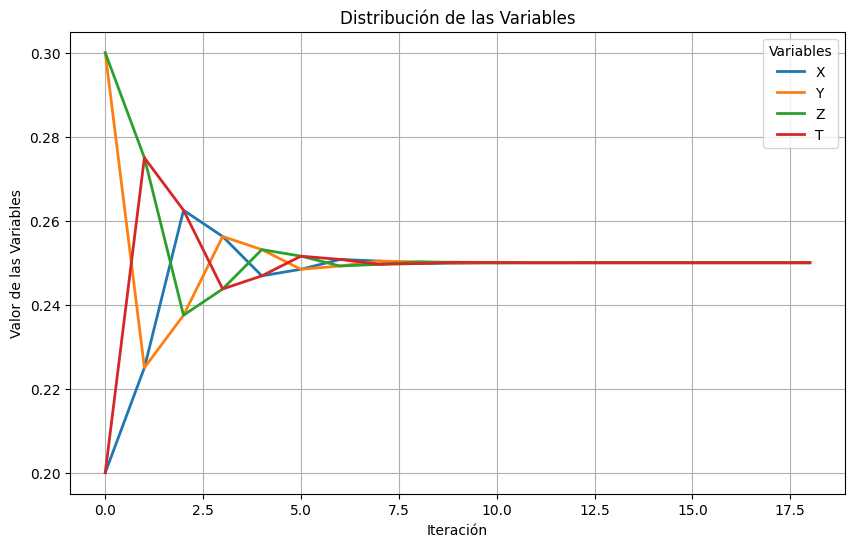

In [71]:
# Grafica
plt.figure(figsize=(10, 6))                                                     # creamos una figura
df.plot(ax=plt.gca(), linewidth=2)                                              # graficamos el dataframe df.plot
                                                                                # ax=plt.gca() asignamos las variables como ejes
plt.title("Distribución de las Variables")                                      # agregamos un titulo
plt.xlabel("Iteración")                                                         # agregamos un nombre al eje X
plt.ylabel("Valor de las Variables")                                            # agregamos un nombre al eje Y
plt.legend(title="Variables")                                                   # agregamos un titulo a la leyenda

plt.grid()                                                                      # agregamos una grilla
plt.show()                                                                      # finalmente graficamos la figura